In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Plots for the Simulation Study

In [3]:
res = pd.read_csv('Results_Syn/Simulation_Concept_Covariate_TLCQM_new2.csv')
# res = res.loc[res['source_size'] != 5000]
res_comp = pd.read_csv('Results_Syn/Simulation_Concept_Covariate_TLCQM_Compare.csv')

In [7]:
# from collections import Counter

# Counter(res['source_target_ratio'])

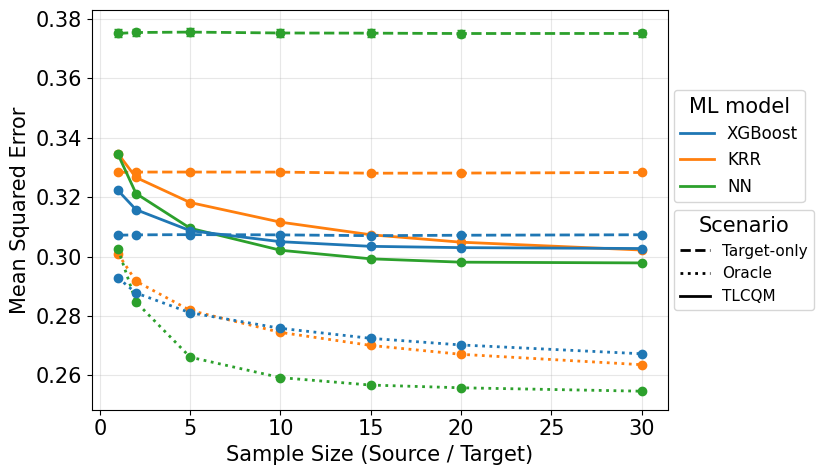

In [12]:
res['source_target_ratio'] = res['source_size'] / res['target_size']

from matplotlib.lines import Line2D
plt.rcParams.update({'font.size': 15})

summary = (
    res
    .groupby(["Method", "source_target_ratio"])
    .agg(
        mean_mse=("MSE", "mean"),
        se_mse=("MSE", lambda x: x.std(ddof=1) / np.sqrt(len(x)))
    )
    .reset_index()
)

# ---- parse Method into model + scenario ----
summary["Model"] = summary["Method"].str.split("_").str[0]
summary["Scenario"] = summary["Method"].str.split("_", n=1).str[1]

# ---- color & linestyle maps ----
color_map = {
    "XGBoost": "tab:blue",
    "KRR": "tab:orange",
    "NN": "tab:green"
}

linestyle_map = {
    "Target-only": "--",
    "Oracle": ":",
    "TLCQM": "-"
}

summary.loc[summary['Scenario'] == "Target_Only", "Scenario"] = "Target-only"

# ---- plot ----
fig, ax = plt.subplots(figsize=(8.5, 5))

for (model, scenario), sub in summary.groupby(["Model", "Scenario"]):
    ax.errorbar(
        sub["source_target_ratio"],
        sub["mean_mse"],
        yerr=sub["se_mse"],
        color=color_map[model],
        linestyle=linestyle_map[scenario],
        marker="o",
        linewidth=2,
        capsize=3
    )

# ---- legend handles ----
model_handles = [
    Line2D([0], [0], color=color_map[m], lw=2, label=m)
    for m in color_map
]

scenario_handles = [
    Line2D([0], [0], color="black", lw=2,
           linestyle=linestyle_map[s], label=s)
    for s in linestyle_map
]

# ---- place legends outside, stacked vertically ----
legend_model = ax.legend(
    handles=model_handles,
    title="ML model",
    loc="upper left",
    bbox_to_anchor=(1.01, 0.8),
    borderaxespad=0.0,
    fontsize=12
)

legend_scenario = ax.legend(
    handles=scenario_handles,
    title="Scenario",
    loc="upper left",
    bbox_to_anchor=(1.01, 0.5),
    borderaxespad=0.0,
    fontsize=11
)

ax.add_artist(legend_model)

# ---- labels & formatting ----
ax.set_xlabel("Sample Size (Source / Target)")
ax.set_ylabel("Mean Squared Error")
# ax.set_title("MSE vs Sample Size\n(Color = Model, Linestyle = Data Scenario)")
ax.grid(True, alpha=0.3)

plt.tight_layout()  # leave space for legends
plt.savefig('./Figures/Sim_Concept_Covariate_Ratio.pdf')

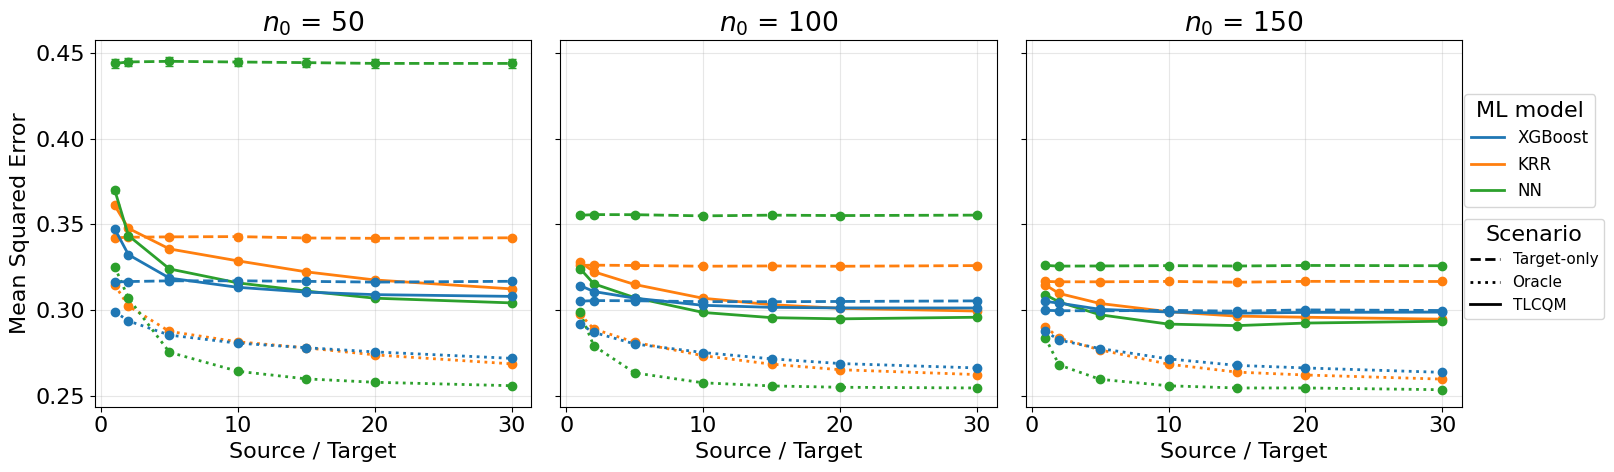

In [18]:
res['source_target_ratio'] = res['source_size'] / res['target_size']

from matplotlib.lines import Line2D
plt.rcParams.update({'font.size': 16})

# ---- recompute ratio ----
res["source_target_ratio"] = res["source_size"] / res["target_size"]

# ---- summary including target_size ----
summary = (
    res
    .groupby(["Method", "target_size", "source_target_ratio"])
    .agg(
        mean_mse=("MSE", "mean"),
        se_mse=("MSE", lambda x: x.std(ddof=1) / np.sqrt(len(x)))
    )
    .reset_index()
)

# ---- parse Method into model + scenario ----
summary["Model"] = summary["Method"].str.split("_").str[0]
summary["Scenario"] = summary["Method"].str.split("_", n=1).str[1]
summary.loc[summary["Scenario"] == "Target_Only", "Scenario"] = "Target-only"

# ---- color & linestyle maps ----
color_map = {
    "XGBoost": "tab:blue",
    "KRR": "tab:orange",
    "NN": "tab:green"
}

linestyle_map = {
    "Target-only": "--",
    "Oracle": ":",
    "TLCQM": "-"
}

# ---- create subplots ----
target_sizes = sorted(summary["target_size"].unique())
fig, axes = plt.subplots(
    1, len(target_sizes),
    figsize=(15, 5),
    sharey=True
)

# ---- plot each panel ----
for ax, tsize in zip(axes, target_sizes):
    sub_ts = summary[summary["target_size"] == tsize]

    for (model, scenario), sub in sub_ts.groupby(["Model", "Scenario"]):
        ax.errorbar(
            sub["source_target_ratio"],
            sub["mean_mse"],
            yerr=sub["se_mse"],
            color=color_map[model],
            linestyle=linestyle_map[scenario],
            marker="o",
            linewidth=2,
            capsize=3
        )

    ax.set_title(f"$n_0$ = {tsize}")
    ax.set_xlabel("Source / Target")
    ax.grid(True, alpha=0.3)

axes[0].set_ylabel("Mean Squared Error")

# ---- legends (shared, outside) ----
model_handles = [
    Line2D([0], [0], color=color_map[m], lw=2, label=m)
    for m in color_map
]

scenario_handles = [
    Line2D([0], [0], color="black", lw=2,
           linestyle=linestyle_map[s], label=s)
    for s in linestyle_map
]

legend_model = fig.legend(
    handles=model_handles,
    title="ML model",
    loc="upper left",
    bbox_to_anchor=(0.98, 0.8),
    fontsize=12
)

legend_scenario = fig.legend(
    handles=scenario_handles,
    title="Scenario",
    loc="upper left",
    bbox_to_anchor=(0.98, 0.55),
    fontsize=11
)

# ---- layout ----
plt.tight_layout()  # leave space for legends
plt.savefig('./Figures/Sim_Concept_Covariate_Ratio_Full.pdf')

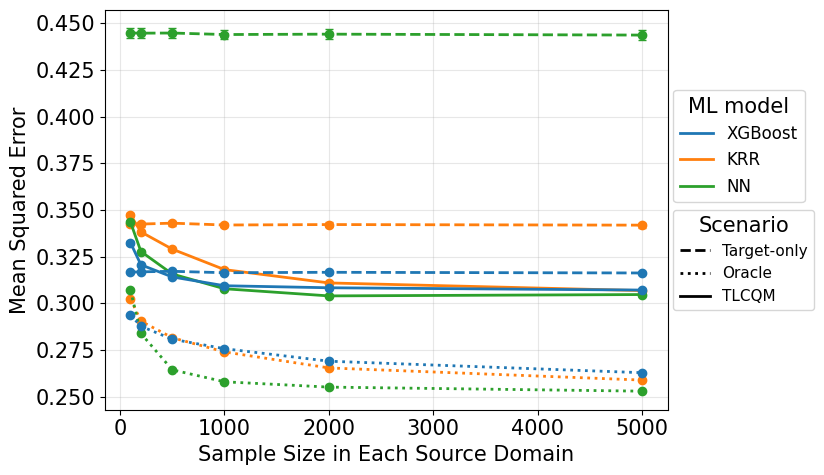

In [97]:
from matplotlib.lines import Line2D
plt.rcParams.update({'font.size': 15})

res1 = res.loc[res['target_size'] == 50]

summary = (
    res1
    .groupby(["Method", "source_size"])
    .agg(
        mean_mse=("MSE", "mean"),
        se_mse=("MSE", lambda x: x.std(ddof=1) / np.sqrt(len(x)))
    )
    .reset_index()
)

# ---- parse Method into model + scenario ----
summary["Model"] = summary["Method"].str.split("_").str[0]
summary["Scenario"] = summary["Method"].str.split("_", n=1).str[1]

# ---- color & linestyle maps ----
color_map = {
    "XGBoost": "tab:blue",
    "KRR": "tab:orange",
    "NN": "tab:green"
}

linestyle_map = {
    "Target-only": "--",
    "Oracle": ":",
    "TLCQM": "-"
}

summary.loc[summary['Scenario'] == "Target_Only", "Scenario"] = "Target-only"

# ---- plot ----
fig, ax = plt.subplots(figsize=(8.5, 5))

for (model, scenario), sub in summary.groupby(["Model", "Scenario"]):
    ax.errorbar(
        sub["source_size"],
        sub["mean_mse"],
        yerr=sub["se_mse"],
        color=color_map[model],
        linestyle=linestyle_map[scenario],
        marker="o",
        linewidth=2,
        capsize=3
    )

# ---- legend handles ----
model_handles = [
    Line2D([0], [0], color=color_map[m], lw=2, label=m)
    for m in color_map
]

scenario_handles = [
    Line2D([0], [0], color="black", lw=2,
           linestyle=linestyle_map[s], label=s)
    for s in linestyle_map
]

# ---- place legends outside, stacked vertically ----
legend_model = ax.legend(
    handles=model_handles,
    title="ML model",
    loc="upper left",
    bbox_to_anchor=(1.01, 0.8),
    borderaxespad=0.0,
    fontsize=12
)

legend_scenario = ax.legend(
    handles=scenario_handles,
    title="Scenario",
    loc="upper left",
    bbox_to_anchor=(1.01, 0.5),
    borderaxespad=0.0,
    fontsize=11
)

ax.add_artist(legend_model)

# ---- labels & formatting ----
ax.set_xlabel("Sample Size in Each Source Domain")
ax.set_ylabel("Mean Squared Error")
# ax.set_title("MSE vs Sample Size\n(Color = Model, Linestyle = Data Scenario)")
ax.grid(True, alpha=0.3)

plt.tight_layout()  # leave space for legends
plt.savefig('./Figures/Sim_Concept_Covariate1.pdf')

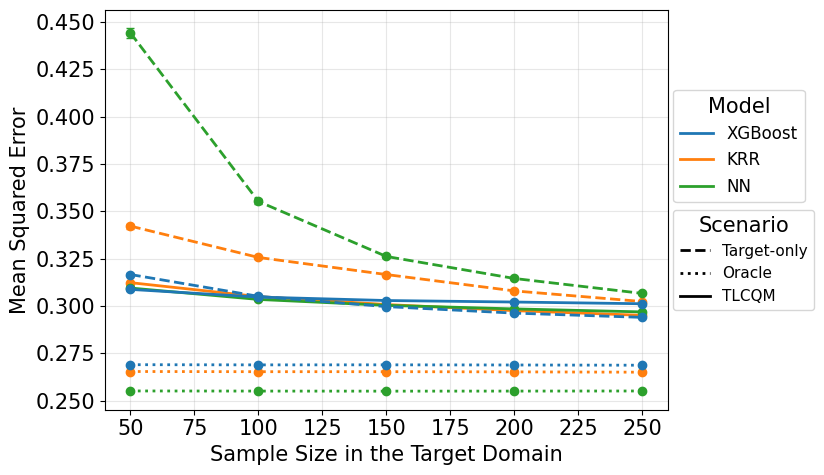

In [84]:
from matplotlib.lines import Line2D
plt.rcParams.update({'font.size': 15})

res1 = res.loc[res['source_size'] == 2000]

summary = (
    res1
    .groupby(["Method", "target_size"])
    .agg(
        mean_mse=("MSE", "mean"),
        se_mse=("MSE", lambda x: x.std(ddof=1) / np.sqrt(len(x)))
    )
    .reset_index()
)

# ---- parse Method into model + scenario ----
summary["Model"] = summary["Method"].str.split("_").str[0]
summary["Scenario"] = summary["Method"].str.split("_", n=1).str[1]

# ---- color & linestyle maps ----
color_map = {
    "XGBoost": "tab:blue",
    "KRR": "tab:orange",
    "NN": "tab:green"
}

linestyle_map = {
    "Target-only": "--",
    "Oracle": ":",
    "TLCQM": "-"
}

summary.loc[summary['Scenario'] == "Target_Only", "Scenario"] = "Target-only"

# ---- plot ----
fig, ax = plt.subplots(figsize=(8.5, 5))

for (model, scenario), sub in summary.groupby(["Model", "Scenario"]):
    ax.errorbar(
        sub["target_size"],
        sub["mean_mse"],
        yerr=sub["se_mse"],
        color=color_map[model],
        linestyle=linestyle_map[scenario],
        marker="o",
        linewidth=2,
        capsize=3
    )

# ---- legend handles ----
model_handles = [
    Line2D([0], [0], color=color_map[m], lw=2, label=m)
    for m in color_map
]

scenario_handles = [
    Line2D([0], [0], color="black", lw=2,
           linestyle=linestyle_map[s], label=s)
    for s in linestyle_map
]

# ---- place legends outside, stacked vertically ----
legend_model = ax.legend(
    handles=model_handles,
    title="Model",
    loc="upper left",
    bbox_to_anchor=(1.01, 0.8),
    borderaxespad=0.0,
    fontsize=12
)

legend_scenario = ax.legend(
    handles=scenario_handles,
    title="Scenario",
    loc="upper left",
    bbox_to_anchor=(1.01, 0.5),
    borderaxespad=0.0,
    fontsize=11
)

ax.add_artist(legend_model)

# ---- labels & formatting ----
ax.set_xlabel("Sample Size in the Target Domain")
ax.set_ylabel("Mean Squared Error")
# ax.set_title("MSE vs Sample Size\n(Color = Model, Linestyle = Data Scenario)")
ax.grid(True, alpha=0.3)

plt.tight_layout()  # leave space for legends
plt.savefig('./Figures/Sim_Concept_Covariate2.pdf')

In [38]:
res['Method1'] = res["Method"].str.split("_", n=1).str[1]
res_full = pd.concat([res_comp, res.loc[(res['Method1'] == 'TLCQM') & (res['source_size'] != 5000)]], axis=0)
res_full = res_full.loc[res_full['source_size'] != 100]

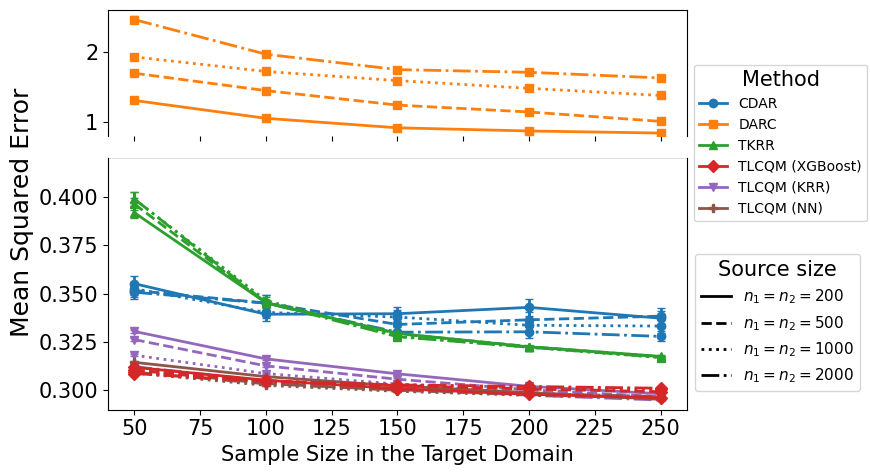

In [77]:
summary = (
    res_full.groupby(["Method", "source_size", "target_size"])["MSE"]
      .agg(mean="mean", sem="sem")
      .reset_index()
)
summary["Method"] = summary["Method"].str.replace(
    r"^(XGBoost|NN|KRR)_TLCQM$",
    r"TLCQM (\1)",
    regex=True
)

method_order = [
    "CDAR",
    "DARC",
    "TKRR",
    "TLCQM (XGBoost)",
    "TLCQM (KRR)",
    "TLCQM (NN)",
]
methods = [m for m in method_order if m in summary["Method"].unique()]
source_sizes = sorted(summary["source_size"].unique())

# Color by method
color_map = {
    m: plt.cm.tab10(i % 10)
    for i, m in enumerate(methods)
}

# Marker by method
markers = ["o", "s", "^", "D", "v", "P", "X", "*"]
marker_map = {
    m: markers[i % len(markers)]
    for i, m in enumerate(methods)
}

# Linestyle by source size
linestyles = ["-", "--", ":", "-."]
linestyle_map = {
    s: linestyles[i % len(linestyles)]
    for i, s in enumerate(source_sizes)
}

fig, (ax_top, ax_bot) = plt.subplots(
    2, 1, sharex=True, figsize=(9, 5),
    gridspec_kw={"height_ratios": [1, 2]}
)

for (method, source_size), g in summary.groupby(["Method", "source_size"]):
    g = g.sort_values("target_size")

    for ax in (ax_top, ax_bot):
        ax.errorbar(
            g["target_size"],
            g["mean"],
            yerr=g["sem"],
            color=color_map[method],
            linestyle=linestyle_map[source_size],
            marker=marker_map[method],
            capsize=3,
            linewidth=2,
            markersize=6
        )

# Set y-limits manually
ax_top.set_ylim(0.8, 2.6)
ax_bot.set_ylim(0.29, 0.42)

# ---- hide spines at the junction ----
ax_top.spines["bottom"].set_visible(False)
ax_bot.spines["top"].set_visible(False)

ax_top.tick_params(labelbottom=False)
ax_bot.tick_params(top=False)

# ---- OPTIONAL: very light separator cue ----
ax_top.axhline(ax_top.get_ylim()[0], color="0.85", lw=0.6)
ax_bot.axhline(ax_bot.get_ylim()[1], color="0.85", lw=0.6)

ax_bot.set_xlabel("Sample Size in the Target Domain")

fig.subplots_adjust(right=0.72)

# --- Legend for Method (color) ---
method_handles = [
    Line2D(
        [0], [0],
        color=color_map[m],
        marker=marker_map[m],
        linestyle="-",
        lw=2,
        markersize=6,
        label=m
    )
    for m in methods
]

legend_method = ax.legend(
    handles=method_handles,
    title="Method",
    loc="upper left",
    bbox_to_anchor=(1, 1.4),
    frameon=True,
    fontsize=10
)
ax.add_artist(legend_method)

# --- Source size legend (linestyle only) ---
source_handles = [
    Line2D(
        [0], [0],
        color="black",
        linestyle=linestyle_map[s],
        lw=2,
        label=f"$n_1=n_2 =${s}",
    )
    for s in source_sizes
]

ax.legend(
    handles=source_handles,
    title="Source size",
    loc="upper left",
    bbox_to_anchor=(1, 0.65),
    frameon=True,
    fontsize=11
)

fig.supylabel("Mean Squared Error", x=0.03, y=0.55)
plt.tight_layout()
plt.savefig('./Figures/Sim_Concept_Covariate_Compare.pdf')

### Plots for the Apartment Data

In [32]:
apart_res = pd.read_csv("Results_Syn/Apartment_TLCQM_Results.csv")
apart_res.loc[apart_res['Method'] == 'XGBoost_Target_Only', 'Method'] = 'XGBoost (target-only)'
apart_res.loc[apart_res['Method'] == 'NN_Target_Only', 'Method'] = 'NN (target-only)'
apart_res.loc[apart_res['Method'] == 'KRR_Target_Only', 'Method'] = 'KRR (target-only)'
apart_res.loc[apart_res['Method'] == 'XGBoost_TLCQM', 'Method'] = 'XGBoost (TLCQM)'
apart_res.loc[apart_res['Method'] == 'NN_TLCQM', 'Method'] = 'NN (TLCQM)'
apart_res.loc[apart_res['Method'] == 'KRR_TLCQM', 'Method'] = 'KRR (TLCQM)'

apart_res = apart_res[~apart_res["Method"].str.contains("_Pool", regex=False)]
apart_res

,Method,MSE,target_size
0,XGBoost (target-only),0.116113,100
1,KRR (target-only),30.900120,100
2,NN (target-only),21.482630,100
6,XGBoost (TLCQM),0.125506,100
7,KRR (TLCQM),2.625427,100
...,...,...,...
23995,CDAR,5.652183,300
23996,DARC,27.116424,300
23997,TKRR,2.542739,500
23998,CDAR,6.340000,500


In [33]:
apart_res.groupby(['Method', 'target_size']).mean().reset_index().sort_values(by='MSE')

,Method,target_size,MSE
35,XGBoost (target-only),500,0.096237
31,XGBoost (TLCQM),500,0.100644
34,XGBoost (target-only),300,0.101917
30,XGBoost (TLCQM),300,0.102667
29,XGBoost (TLCQM),200,0.105507
33,XGBoost (target-only),200,0.107381
28,XGBoost (TLCQM),100,0.111005
18,NN (TLCQM),300,0.116719
19,NN (TLCQM),500,0.117474
32,XGBoost (target-only),100,0.117689


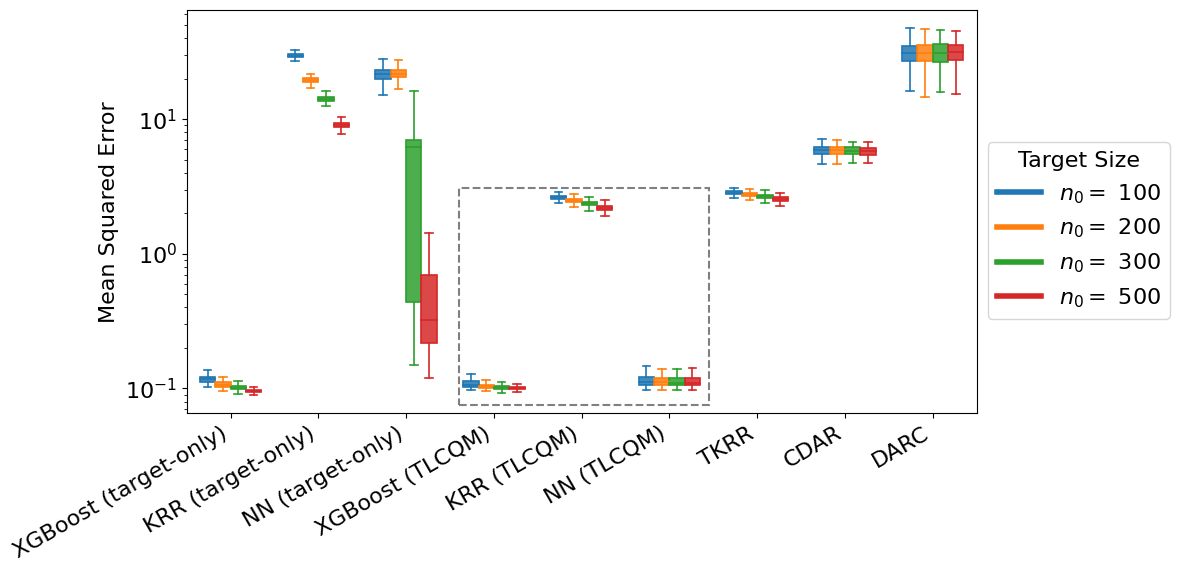

In [66]:
from matplotlib.colors import to_rgba
from matplotlib.patches import Rectangle

plt.rcParams.update({'font.size': 16})

df = apart_res

# prepare categories
df["target_size"] = df["target_size"].astype(str)
methods = df["Method"].unique()
sizes = sorted(df["target_size"].unique())

# color palette fixed by target_size
palette = dict(zip(
    sizes,
    plt.get_cmap("tab10").colors[:len(sizes)]
))

fig, ax = plt.subplots(figsize=(12, 6))

box_width = 0.7 / len(sizes)
x_positions = np.arange(len(methods))

for i, size in enumerate(sizes):
    data = [
        df.loc[(df["Method"] == m) & (df["target_size"] == size), "MSE"].values
        for m in methods
    ]

    pos = x_positions - 0.35 + i * box_width + box_width / 2

    bp = ax.boxplot(
        data,
        positions=pos,
        widths=box_width,
        patch_artist=True,
        showfliers=False,
        manage_ticks=False
    )

    color = palette[size]

    # color everything
    for element in ["boxes", "whiskers", "caps", "medians"]:
        for item in bp[element]:
            item.set_color(color)
            item.set_linewidth(1.2)

    for box in bp["boxes"]:
        box.set_facecolor(to_rgba(color, alpha=0.85))

# axis formatting
ax.set_xticks(x_positions)
ax.set_xticklabels(methods, rotation=30, ha="right")
# ax.set_xlabel("Method")
ax.set_ylabel("Mean Squared Error")
ax.set_yscale('log')
# ax.set_title("MSE by Method and Target Size")

# legend
handles = [
    plt.Line2D([0], [0], color=palette[s], lw=4, label=f"$n_0=$ {s}")
    for s in sizes
]
ax.legend(handles=handles, title="Target Size",
          bbox_to_anchor=(1, 0.7), loc="upper left")
ax.set_xlim(-0.5, len(methods) - 0.5)

# indices of methods to highlight (4th–6th)
start_idx = 3
end_idx = 5

# rectangle boundaries
x_left = start_idx - 0.5
width = (end_idx - start_idx + 1)

y_min, y_max = ax.get_ylim()

rect = Rectangle(
    (x_left+0.1, y_min+0.01),
    width-0.15,
    3,
    linewidth=1.5,
    edgecolor="grey",
    facecolor="none",
    linestyle="--",
    zorder=0
)

ax.add_patch(rect)

plt.tight_layout()
plt.savefig('./Figures/Apartment_Res.pdf')